In [15]:
%reload_ext autoreload
%autoreload 2

In [16]:
# import libraries
import numpy as np
import sys
import psi4
from helper_PFCI import PFHamiltonianGenerator
np.set_printoptions(threshold=sys.maxsize)
psi4.core.set_output_file('output.dat', False)
import time
import json
import matplotlib.pyplot as plt

We are going to read the energy eigenvalues and dipole matrix elements from .npy files.  We will also still create an instance of the PFHamiltonianGenerator class so we can use its build_pcqed_pf_hamiltonian() method, but it is not really important what details we use to instantiate this class... so we will use LiH in a minimal basis since this is a fast way to instantiate the class!

In [17]:
# # Set the molecule and bond length
# mol = psi4.geometry("""
# 0 1
# O
# H 1 1.0
# """)

# # Optimize the geometry to obtain the new coordinates
# psi4.optimize('scf/cc-pvdz')

# # Get the new optimized coordinates
# new_coordinates = mol.geometry()

# # Print the new coordinates
# print(new_coordinates)

In [18]:
# read data from .npy files for formaldehyde casci(8,8) calculations

# !!! Change this to the correct path on your computer!
npy_folder = "/Users/proden/Code/data_repository/Mapol/LiH/PCQED/6-311G/r_1.4/"

# these file names should still be good
E_npy_file = npy_folder + "LiH_r_1.4_6311g_fci_Energies.npy"
Mu_npy_file = npy_folder + "LiH_r_1.4_6311g_fci_Dipoles.npy"

# store energy eigenvalues in E_array
E_array = np.load(E_npy_file)
# store dipole matrix elements in Mu_array
Mu_array = np.load(Mu_npy_file)

# print their shape so we know how many elements we have
print(np.shape(E_array))
print(np.shape(Mu_array))
print(E_array)

(250,)
(250, 250, 3)
[-8.01219476 -7.899962   -7.88593596 -7.86104863 -7.86104863 -7.84851087
 -7.84851087 -7.80693549 -7.78459936 -7.76702524 -7.76342939 -7.75827098
 -7.75827098 -7.75123644 -7.75123644 -7.72171149 -7.68303148 -7.53167595
 -7.46183148 -7.44561152 -7.44561152 -7.44122102 -7.41700688 -7.41700688
 -7.41499491 -7.41499491 -7.40506676 -7.40302238 -7.39081209 -7.38221021
 -7.38221021 -7.37219855 -7.37219855 -7.36897222 -7.36897222 -7.35609042
 -7.35609042 -7.33714534 -7.33343267 -7.32130747 -7.31448363 -7.31448363
 -7.306799   -7.306799   -7.30583178 -7.30363511 -7.29983049 -7.29983049
 -7.29710106 -7.28736609 -7.28736609 -7.27939388 -7.27254896 -7.26716866
 -7.26189291 -7.26189291 -7.26028229 -7.26028229 -7.24463063 -7.24419397
 -7.24419397 -7.24111323 -7.23094221 -7.22795844 -7.22795844 -7.2276023
 -7.2276023  -7.21883619 -7.21553431 -7.20683738 -7.20683738 -7.19644038
 -7.18180272 -7.17656251 -7.15921998 -7.15921998 -7.15824942 -7.15347534
 -7.15347534 -7.14947376 -7.149

In [19]:
# setup basic arguments to create an instance of the PFHamiltonianGenerator class
mol_str = """
    Li
    H 1 1.4
    symmetry c1
"""


options_dict = {
    "basis": "sto-3g",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
}


cavity_free_dict = {
    'omega_value' : 0.12086,
    'lambda_vector' : np.array([0, 0, 0.0]),
    'ci_level' : 'fci',   
    'full_diagonalization' : True,
    'number_of_photons' : 10, 
}

# create the instance of our PFHamiltonianGenerator class
instance = PFHamiltonianGenerator(mol_str, options_dict, cavity_free_dict)


Start SCF iterations:

Canonical RHF One-electron energy = -12.6946346236295895
CQED-RHF One-electron energy      = -12.6946346236295895
Nuclear repulsion energy          = 1.1339511657214287
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8605386610570402   dE = -7.86054E+00   dRMS = 1.78708E-13
SCF Iteration   2: Energy = -7.8605386610570491   dE = -8.88178E-15   dRMS = 3.96912E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86053866 hartree
Psi4  SCF energy: -7.86053866 hartree
 Completed QED-RHF in 0.12496113777160645 seconds
 Completed 1HSO Build in 9.894371032714844e-05 seconds
 Completed ERI Build in 0.0012590885162353516 seconds 
 Completed 2D build in 0.0002040863037109375 seconds
 Completed 1G build in 3.2901763916015625e-05 seconds
 Completed the Dipole Matrix Build in 5.1021575927734375e-05 seconds
 Completed determinant list in 0.0005030632019042969 seconds 
 Completed constant offset matrix in 0.00022292137145

lambda vector:  [0.    0.    0.025]   energy to second order:  -8.01156192994626
lambda vector:  [0.    0.    0.024]   energy to second order:  -8.011611034429858
lambda vector:  [0.    0.    0.023]   energy to second order:  -8.011658216059605
lambda vector:  [0.    0.    0.022]   energy to second order:  -8.011703464659153
lambda vector:  [0.    0.    0.021]   energy to second order:  -8.01174677048519
lambda vector:  [0.   0.   0.02]   energy to second order:  -8.011788124227442
lambda vector:  [0.    0.    0.019]   energy to second order:  -8.011827517008665
lambda vector:  [0.    0.    0.018]   energy to second order:  -8.01186494038466
lambda vector:  [0.    0.    0.017]   energy to second order:  -8.011900386344257
lambda vector:  [0.    0.    0.016]   energy to second order:  -8.011933847309324
lambda vector:  [0.    0.    0.015]   energy to second order:  -8.011965316134763
lambda vector:  [0.    0.    0.014]   energy to second order:  -8.011994786108518
lambda vector:  [0.   

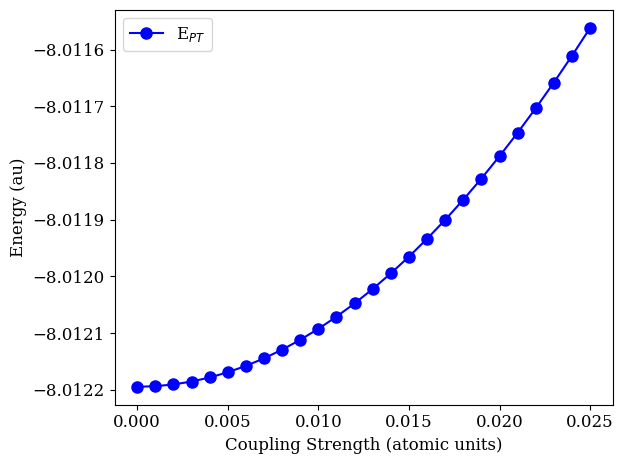

In [20]:
#coherent state transformation
lambdlambda_vecs = []
energy_vals = [] 


lambda_vector = np.array([0.0, 0.0, .025])


for i in range(0, 26):


    energy = instance.compute_energy_to_second_order(E_array, lambda_vector, Mu_array, coherent_state=True)


    print("lambda vector: ", lambda_vector , "  energy to second order: " , energy)


    lambdlambda_vecs.append(lambda_vector[2])
    energy_vals.append(energy)
    lambda_vector[2] += -0.001


energy_vals.reverse()
lambdlambda_vecs.reverse()

from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
plt.plot(lambdlambda_vecs, energy_vals, color="blue",  marker="o", ms="8", label="E$_{PT}$")
plt.xlabel("Coupling Strength (atomic units)")
plt.ylabel("Energy (au)")
#plt.xticks([0, 0.005, 0.01, 0.015, 0.020, 0.025])
#plt.xlim(0, 0.025)
#plt.ylim( -8.0122, -8.01204)
plt.tight_layout()
plt.legend()

lambda vector:  [0.    0.    0.025]   energy to second order:  -8.011573464607407
lambda vector:  [0.    0.    0.024]   energy to second order:  -8.011620831354621
lambda vector:  [0.    0.    0.023]   energy to second order:  -8.011666479409644
lambda vector:  [0.    0.    0.022]   energy to second order:  -8.01171038194192
lambda vector:  [0.    0.    0.021]   energy to second order:  -8.011752513262621
lambda vector:  [0.   0.   0.02]   energy to second order:  -8.011792848824648
lambda vector:  [0.    0.    0.019]   energy to second order:  -8.01183136522262
lambda vector:  [0.    0.    0.018]   energy to second order:  -8.011868040192889
lambda vector:  [0.    0.    0.017]   energy to second order:  -8.011902852613526
lambda vector:  [0.    0.    0.016]   energy to second order:  -8.011935782504338
lambda vector:  [0.    0.    0.015]   energy to second order:  -8.011966811026848
lambda vector:  [0.    0.    0.014]   energy to second order:  -8.011995920484306
lambda vector:  [0.  

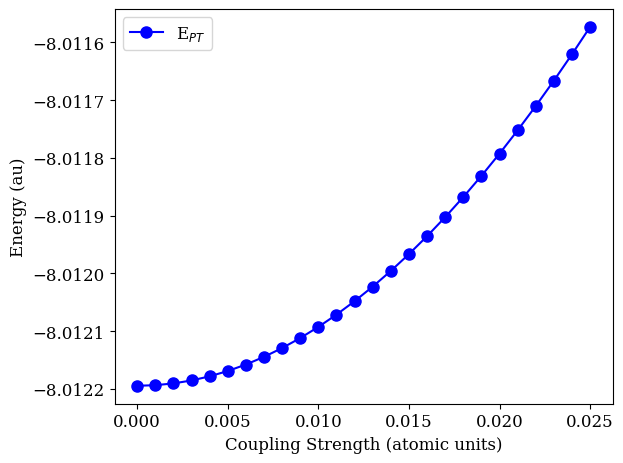

In [21]:
#photon number basis
lambdlambda_vecs = []
energy_vals = [] 


lambda_vector = np.array([0.0, 0.0, .025])


for i in range(0, 26):


    energy = instance.compute_energy_to_second_order(E_array, lambda_vector, Mu_array)


    print("lambda vector: ", lambda_vector , "  energy to second order: " , energy)


    lambdlambda_vecs.append(lambda_vector[2])
    energy_vals.append(energy)
    lambda_vector[2] += -0.001


energy_vals.reverse()
lambdlambda_vecs.reverse()

from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
plt.plot(lambdlambda_vecs, energy_vals, color="blue",  marker="o", ms="8", label="E$_{PT}$")
plt.xlabel("Coupling Strength (atomic units)")
plt.ylabel("Energy (au)")
#plt.xticks([0, 0.005, 0.01, 0.015, 0.020, 0.025])
#plt.xlim(0, 0.025)
#plt.ylim( -8.0122, -8.01204)
plt.tight_layout()
plt.legend()

lambda vector:  [0.    0.    0.025]   energy to second order:  -8.013844891037992
lambda vector:  [0.    0.    0.024]   energy to second order:  -8.013715520622451
lambda vector:  [0.    0.    0.023]   energy to second order:  -8.013591430632033
lambda vector:  [0.    0.    0.022]   energy to second order:  -8.01347262106674
lambda vector:  [0.    0.    0.021]   energy to second order:  -8.01335909192657
lambda vector:  [0.   0.   0.02]   energy to second order:  -8.013250843211525
lambda vector:  [0.    0.    0.019]   energy to second order:  -8.013147874921604
lambda vector:  [0.    0.    0.018]   energy to second order:  -8.013050187056807
lambda vector:  [0.    0.    0.017]   energy to second order:  -8.012957779617135
lambda vector:  [0.    0.    0.016]   energy to second order:  -8.012870652602587
lambda vector:  [0.    0.    0.015]   energy to second order:  -8.012788806013162
lambda vector:  [0.    0.    0.014]   energy to second order:  -8.012712239848861
lambda vector:  [0.  

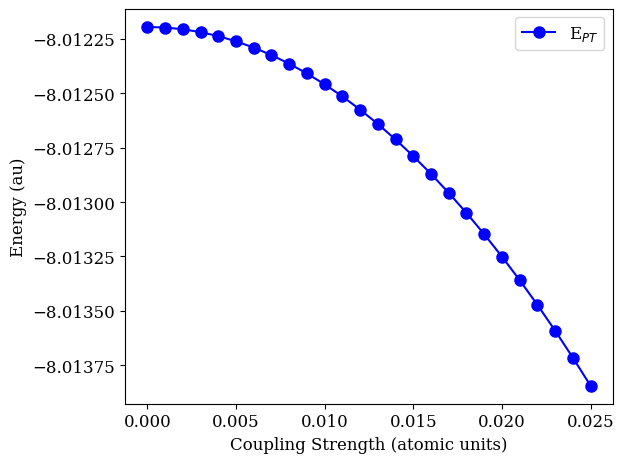

In [22]:
#photon number basis and neglect dipole self erngy
lambdlambda_vecs = []
energy_vals = [] 


lambda_vector = np.array([0.0, 0.0, .025])


for i in range(0, 26):


    energy = instance.compute_energy_to_second_order(E_array, lambda_vector, Mu_array, neglected_DSE_option=True)


    print("lambda vector: ", lambda_vector , "  energy to second order: " , energy)


    lambdlambda_vecs.append(lambda_vector[2])
    energy_vals.append(energy)
    lambda_vector[2] += -0.001


energy_vals.reverse()
lambdlambda_vecs.reverse()

from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
plt.plot(lambdlambda_vecs, energy_vals, color="blue",  marker="o", ms="8", label="E$_{PT}$")
plt.xlabel("Coupling Strength (atomic units)")
plt.ylabel("Energy (au)")
#plt.xticks([0, 0.005, 0.01, 0.015, 0.020, 0.025])
#plt.xlim(0, 0.025)
#plt.ylim( -8.0122, -8.01204)
plt.tight_layout()
plt.legend()

lambda vector:  [0.    0.    0.025]   energy to second order:  -8.012468507256521
lambda vector:  [0.    0.    0.024]   energy to second order:  -8.012447045329447
lambda vector:  [0.    0.    0.023]   energy to second order:  -8.012426459399396
lambda vector:  [0.    0.    0.022]   energy to second order:  -8.012406749466368
lambda vector:  [0.    0.    0.021]   energy to second order:  -8.012387915530365
lambda vector:  [0.   0.   0.02]   energy to second order:  -8.012369957591384
lambda vector:  [0.    0.    0.019]   energy to second order:  -8.012352875649427
lambda vector:  [0.    0.    0.018]   energy to second order:  -8.012336669704494
lambda vector:  [0.    0.    0.017]   energy to second order:  -8.012321339756584
lambda vector:  [0.    0.    0.016]   energy to second order:  -8.012306885805696
lambda vector:  [0.    0.    0.015]   energy to second order:  -8.012293307851833
lambda vector:  [0.    0.    0.014]   energy to second order:  -8.012280605894993
lambda vector:  [0.

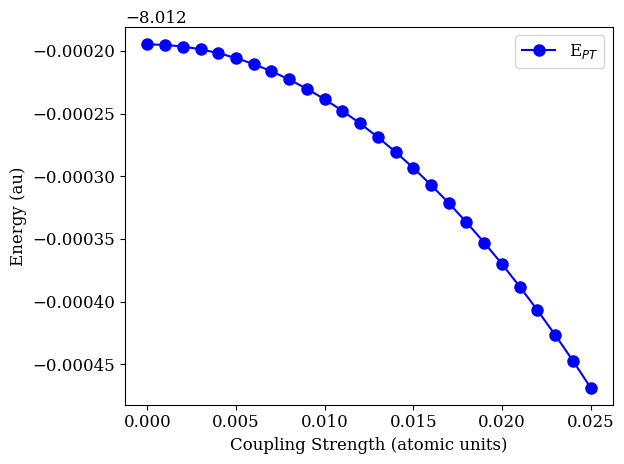

In [23]:
#coherent state basis and neglect dipole self erngy
lambdlambda_vecs = []
energy_vals = [] 


lambda_vector = np.array([0.0, 0.0, .025])


for i in range(0, 26):


    energy = instance.compute_energy_to_second_order(E_array, lambda_vector, Mu_array, neglected_DSE_option=True, coherent_state=True)


    print("lambda vector: ", lambda_vector , "  energy to second order: " , energy)


    lambdlambda_vecs.append(lambda_vector[2])
    energy_vals.append(energy)
    lambda_vector[2] += -0.001


energy_vals.reverse()
lambdlambda_vecs.reverse()

from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
plt.plot(lambdlambda_vecs, energy_vals, color="blue",  marker="o", ms="8", label="E$_{PT}$")
plt.xlabel("Coupling Strength (atomic units)")
plt.ylabel("Energy (au)")
#plt.xticks([0, 0.005, 0.01, 0.015, 0.020, 0.025])
#plt.xlim(0, 0.025)
#plt.ylim( -8.0122, -8.01204)
plt.tight_layout()
plt.legend()